# Geoprop

This crate provides a Python API for select [geoprop] functionality.

[geoprop]: https://github.com/novalabsxyz/geoprop

## Examples

### Tiles

A single Tiles instance should be used for all geoprop operations as it gets faster with caching. But for simplicity sake, all examples will construct their own so they are self contained.

In [1]:
from geoprop import Tiles
tiles = Tiles("nasadem/3-arcsecond/srtm/")

### Sampling elevation

In [2]:
from geoprop import Tiles, Point

tiles = Tiles("nasadem/3-arcsecond/srtm/")
# The lowest point in the US at −86m, but note that
# SRTM isn't 100% accurate and the following call returns -84m.
badwater_basin = Point(36.250278, -116.825833)
tiles.elevation(badwater_basin)

-84

### Coverage

In [3]:
from geoprop import Tiles, Itm, Point, Climate

tiles = Tiles("nasadem/3-arcsecond/srtm/")

# Create a reusable Itm object contains 
# less-frequently changing parameters.
itm = Itm(tiles, climate = Climate.Desert)

# Let's generate a coverage map for a section of the Grand Canyon
center = Point(36.159600, -112.306877, 1000)
rx_alt_m = 1
h3_res = 10
freq_hz = 900e6
radius_km = 12

# Generate coverage estimates as (h3 cell, ground elevation, attenutation dBs)
grand_canyon_estimated_coverage = itm.coverage(center, h3_res, freq_hz, radius_km, rx_alt_m, rx_threshold_db = None)

[![Grand Canyon](https://github.com/JayKickliter/geoprop-py/assets/2551201/0dd53033-eaf7-4560-bb5c-d05cbc3be660)](https://kepler.gl/#/demo?mapUrl=https://gist.githubusercontent.com/JayKickliter/5b99561a9658e62d67474b3a6eff52a1/raw/48d45ff01bd4908c46296c3445aef07068b1b2a9/grand-canyon-kepler.gl.json)

### Terrain profile

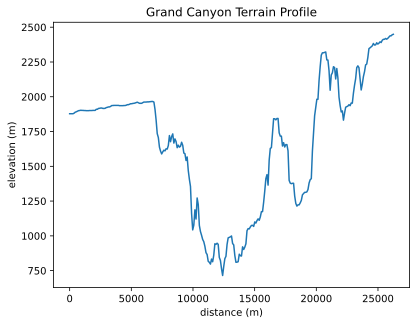

In [4]:
from geoprop import Tiles, Profile, Point
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

tiles = Tiles("nasadem/3-arcsecond/srtm/")

start = Point(36.00413897612008, -112.2797569088778, 3)
end = Point(36.20334730019485, -112.1230717397408, 3)

grand_canyon_profile = tiles.profile(start, end)
fig, ax = plt.subplots()
ax.plot(grand_canyon_profile.distances(), grand_canyon_profile.elevation())
ax.set_title('Grand Canyon Terrain Profile')
ax.set_ylabel('elevation (m)')
ax.set_xlabel('distance (m)');

### Point to point attenuation

In [5]:
from geoprop import Tiles, Profile, Point, Climate, Itm
import matplotlib.pyplot as plt

tiles = Tiles("nasadem/3-arcsecond/srtm/")
itm = Itm(tiles, climate = Climate.Desert)

start = Point(36.00413897612008, -112.2797569088778, 3)
end = Point(36.20334730019485, -112.1230717397408, 3)

grand_canyon_profile = tiles.profile(start, end)
freq = 900e6

itm.p2p(grand_canyon_profile, freq)

177.84309887662644

### Path attenuation

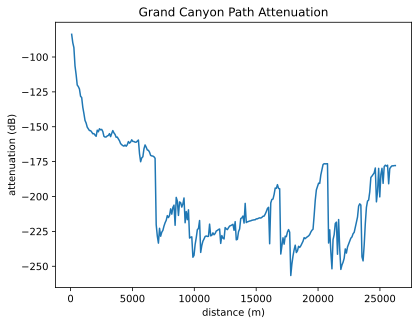

In [6]:
from geoprop import Tiles, Profile, Point, Itm, Climate
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

tiles = Tiles("nasadem/3-arcsecond/srtm/")
itm = Itm(tiles, climate = Climate.Desert)

start = Point(36.00413897612008, -112.2797569088778, 3)
end = Point(36.20334730019485, -112.1230717397408, 3)

grand_canyon_profile = tiles.profile(start, end)

freq = 900e6
grand_canyon_atten = [-dB for dB in itm.path(grand_canyon_profile, freq)]
fig, ax = plt.subplots()
distances = grand_canyon_profile.distances()[1:]
ax.plot(distances, grand_canyon_atten)
ax.set_title('Grand Canyon Path Attenuation')
ax.set_xlabel('distance (m)')
ax.set_ylabel('attenuation (dB)');